In [ ]:
import json
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = next(iter(uploaded))

# Step 3: Read and parse the JSON file
with open(file_name, 'r') as f:
    data = json.load(f)


Saving P1- BankStatements.json to P1- BankStatements (5).json


In [ ]:
def print_json_summary(data):
    if isinstance(data, list):
        print(f"JSON data is a list with {len(data)} entries.")
        print("Here are the first few entries:")
        for entry in data[:5]:
            print(entry)
    elif isinstance(data, dict):
        print(f"JSON data is a dictionary with {len(data)} keys.")
        print("Here are the first few key-value pairs:")
        for i, (key, value) in enumerate(data.items()):
            if i >= 5:
                break
            print(f"{key}: {value}")
    else:
        print("JSON data is of a different type.")
    print("\nSample of JSON data:")
    print(json.dumps(data, indent=2)[:500])
print_json_summary(data)

JSON data is a dictionary with 1 keys.
Here are the first few key-value pairs:
Account: {'type': 'deposit', 'maskedAccNumber': 'XXXX6461', 'version': '1.1', 'linkedAccRef': '02f28b8d-d8a3-43d7-88c6-5fabb2e51541', 'xmlns': 'http://api.rebit.org.in/FISchema/deposit', 'xsi:schemaLocation': 'http://api.rebit.org.in/FISchema/deposit.xsd', 'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance', 'Profile': {'Holders': {'type': 'SINGLE', 'Holder': {'name': 'Arun Shakya', 'dob': '2000-06-09', 'mobile': '8429489761', 'nominee': 'REGISTERED', 'address': '', 'email': 'NA', 'pan': 'FORM60', 'ckycCompliance': 'true'}}}, 'Summary': {'currentBalance': '761.41', 'currency': 'INR', 'exchgeRate': '1', 'balanceDateTime': '2024-05-30T03:05:12+05:30', 'type': 'SAVINGS', 'branch': 'AMETHI JADID, UP', 'ifscCode': 'BARB0AMEJAD', 'micrCode': '209012004', 'openingDate': '2020-11-24', 'currentODLimit': '0.00', 'drawingLimit': '0.00', 'status': 'ACTIVE', 'Pending': {'amount': '0.0'}}, 'Transactions': {'startDate

In [ ]:
import pandas as pd
import json
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = next(iter(uploaded))

# Step 3: Read and parse the JSON file
with open(file_name, 'r') as f:
    data = json.load(f)

# Extract transactions data
transactions = data['Account']['Transactions']['Transaction']

# Convert JSON data to a DataFrame
df = pd.DataFrame(transactions)

# Convert amount to numeric type
df['amount'] = pd.to_numeric(df['amount'])

# Total number of transactions
total_transactions = df.shape[0]
print(f"Total number of transactions: {total_transactions}")

# Define small and large transactions
small_threshold = 1000  # Example threshold for small transactions
df['TransactionSize'] = df['amount'].apply(lambda x: 'small' if x <= small_threshold else 'large')

# Distribution of transaction amounts
transaction_distribution = df['TransactionSize'].value_counts()
print("\nDistribution of transaction amounts:")
print(transaction_distribution)

# Frequency of different transaction types
transaction_types_frequency = df['type'].value_counts()
print("\nFrequency of different transaction types (debit vs. credit):")
print(transaction_types_frequency)

# Example of displaying the first few rows of the DataFrame for verification
print("\nFirst few rows of the transactions DataFrame:")
print(df.head())

# Optional: Save analysis results to a CSV file
analysis_results = {
    "Total Transactions": [total_transactions],
    "Small Transactions": [transaction_distribution.get('small', 0)],
    "Large Transactions": [transaction_distribution.get('large', 0)],
    "Debit Transactions": [transaction_types_frequency.get('DEBIT', 0)],
    "Credit Transactions": [transaction_types_frequency.get('CREDIT', 0)]
}

results_df = pd.DataFrame(analysis_results)
results_csv_file_name = 'transaction_analysis_results.csv'
results_df.to_csv(results_csv_file_name, index=False)

# Download the analysis results CSV file
files.download(results_csv_file_name)


Saving P1- BankStatements.json to P1- BankStatements.json
Total number of transactions: 985

Distribution of transaction amounts:
TransactionSize
small    836
large    149
Name: count, dtype: int64

Frequency of different transaction types (debit vs. credit):
type
DEBIT     695
CREDIT    290
Name: count, dtype: int64

First few rows of the transactions DataFrame:
     type    mode  amount currentBalance       transactionTimestamp  \
0   DEBIT    CARD   100.0        2180.80  2023-06-27T09:40:19+05:30   
1   DEBIT    CARD   170.0        2010.80  2023-06-28T09:51:57+05:30   
2   DEBIT    CARD   500.0        1510.80  2023-07-26T10:04:00+05:30   
3  CREDIT  OTHERS    15.0        1525.80  2023-08-06T11:10:38+05:30   
4   DEBIT     ATM  1000.0         525.80  2023-08-07T17:13:13+05:30   

    valueDate      txnId                                    narration  \
0  2023-06-27  S39488701        PRCR/MS NEHA FILLING STATIO/FARRUKHAB   
1  2023-06-28  S76862822        PRCR/MS NEHA FILLING STATIO/F

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving P1- BankStatements.json to P1- BankStatements (1).json


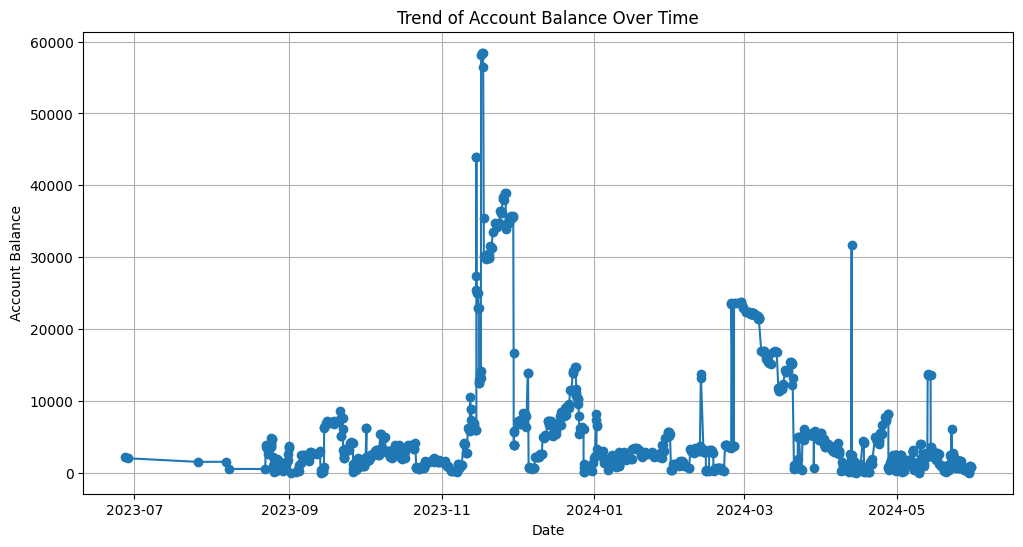


Periods with significant changes in the account balance:
         transactionTimestamp  currentBalance  balanceChange  \
4   2023-08-07 17:13:13+05:30          525.80        -1000.0   
6   2023-08-22 11:49:13+05:30         3524.80         3000.0   
8   2023-08-23 08:17:48+05:30         2624.80        -1200.0   
14  2023-08-24 18:22:22+05:30         4834.80          750.0   
17  2023-08-25 10:24:38+05:30         2244.80        -2480.0   
..                        ...             ...            ...   
948 2024-05-24 19:33:51+05:30         1220.31          600.0   
950 2024-05-25 07:47:07+05:30         1690.31          600.0   
954 2024-05-25 14:11:41+05:30          930.31         -640.0   
959 2024-05-25 22:54:11+05:30         1690.31         1000.0   
981 2024-05-30 05:07:05+05:30          961.41          938.0   

                                             narration  
4               ATM/CASH/321917012791/XXXXXXXXXXXX8896  
6       UPI/323441197152/114914/UPI/8795417446ybl/Paym  
8 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import json
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = next(iter(uploaded))

# Step 3: Read and parse the JSON file
with open(file_name, 'r') as f:
    data = json.load(f)

# Extract transactions data
transactions = data['Account']['Transactions']['Transaction']

# Convert JSON data to a DataFrame
df = pd.DataFrame(transactions)

# Convert amount and current balance to numeric type
df['amount'] = pd.to_numeric(df['amount'])
df['currentBalance'] = pd.to_numeric(df['currentBalance'])

# Convert transaction timestamp to datetime
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])

# Sort DataFrame by transaction timestamp
df.sort_values(by='transactionTimestamp', inplace=True)

# Plot the trend of the account balance over time
plt.figure(figsize=(12, 6))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-')
plt.title('Trend of Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

# Calculate the difference in balance between consecutive transactions
df['balanceChange'] = df['currentBalance'].diff()

# Identify periods with significant changes in the account balance
# Define a threshold for significant change (e.g., absolute change greater than 500)
significant_threshold = 500
significant_changes = df[df['balanceChange'].abs() > significant_threshold]

print("\nPeriods with significant changes in the account balance:")
print(significant_changes[['transactionTimestamp', 'currentBalance', 'balanceChange', 'narration']])

# Optional: Save the DataFrame with balance changes to a CSV file
df.to_csv('balance_analysis.csv', index=False)
files.download('balance_analysis.csv')


Saving P1- BankStatements.json to P1- BankStatements (2).json

Spending patterns by category:
           Category  Frequency  TotalAmount
0   ATM Withdrawals          3     13500.00
1             Other        193    242067.51
2  UPI Transactions        789    587092.90


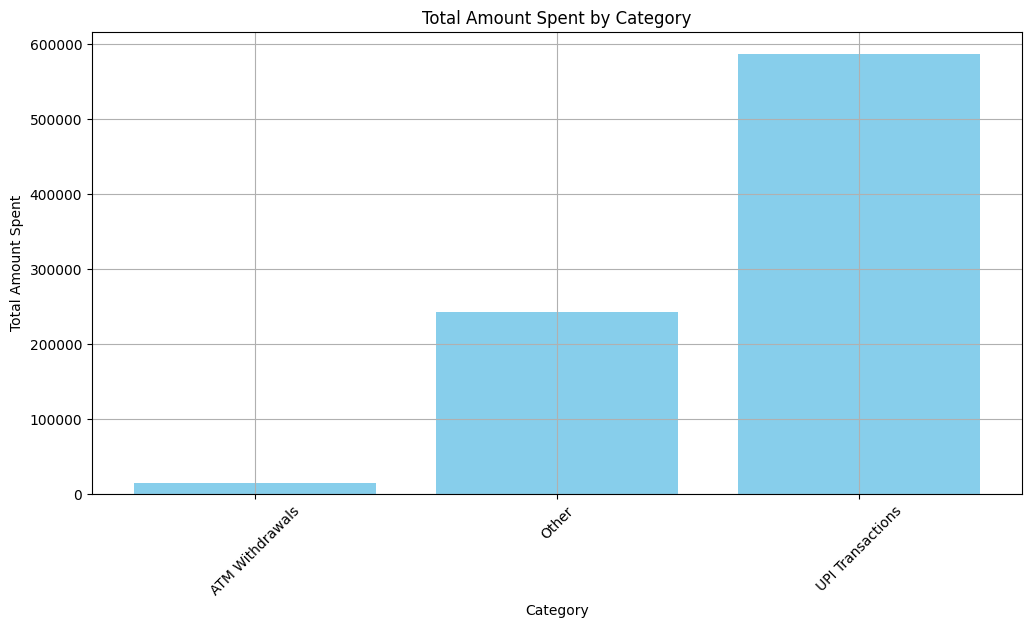

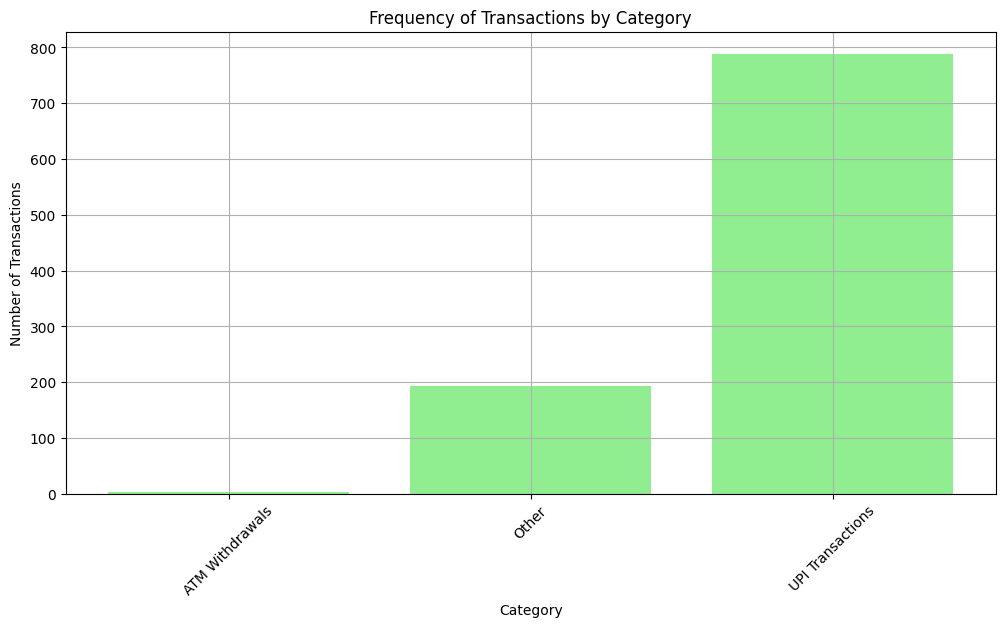

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import json
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = next(iter(uploaded))

# Step 3: Read and parse the JSON file
with open(file_name, 'r') as f:
    data = json.load(f)

# Extract transactions data
transactions = data['Account']['Transactions']['Transaction']

# Convert JSON data to a DataFrame
df = pd.DataFrame(transactions)

# Convert amount to numeric type
df['amount'] = pd.to_numeric(df['amount'])

# Define a function to categorize expenses based on narration or mode
def categorize_transaction(narration, mode):
    narration = narration.lower()
    mode = mode.lower()

    if 'fuel' in narration or 'filling station' in narration:
        return 'Fuel'
    elif 'ecommerce' in narration or 'online' in narration or 'amazon' in narration or 'flipkart' in narration:
        return 'Ecommerce'
    elif 'restaurant' in narration or 'food' in narration or 'eatery' in narration:
        return 'Food'
    elif 'shopping' in narration or 'mall' in narration:
        return 'Shopping'
    elif 'atm' in narration or mode == 'atm':
        return 'ATM Withdrawals'
    elif 'upi' in mode:
        return 'UPI Transactions'
    else:
        return 'Other'

# Apply categorization function
df['Category'] = df.apply(lambda row: categorize_transaction(row['narration'], row['mode']), axis=1)

# Analyze frequency and amount of spending in each category
category_analysis = df.groupby('Category').agg(
    Frequency=('amount', 'count'),
    TotalAmount=('amount', 'sum')
).reset_index()

print("\nSpending patterns by category:")
print(category_analysis)

# Plot the spending patterns
plt.figure(figsize=(12, 6))
plt.bar(category_analysis['Category'], category_analysis['TotalAmount'], color='skyblue')
plt.title('Total Amount Spent by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the frequency of spending
plt.figure(figsize=(12, 6))
plt.bar(category_analysis['Category'], category_analysis['Frequency'], color='lightgreen')
plt.title('Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Optional: Save the analysis results to a CSV file
category_analysis.to_csv('spending_patterns_analysis.csv', index=False)
files.download('spending_patterns_analysis.csv')


Saving P1- BankStatements.json to P1- BankStatements (3).json

Income patterns by category:
  IncomeCategory  Frequency  TotalAmount
0          Other        189    241237.51
1         Salary          2      2600.00
2    UPI Credits         99    176733.00


<ipython-input-4-53ae5b8c9e23>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df['IncomeCategory'] = credit_df.apply(lambda row: categorize_income(row['narration'], row['mode']), axis=1)


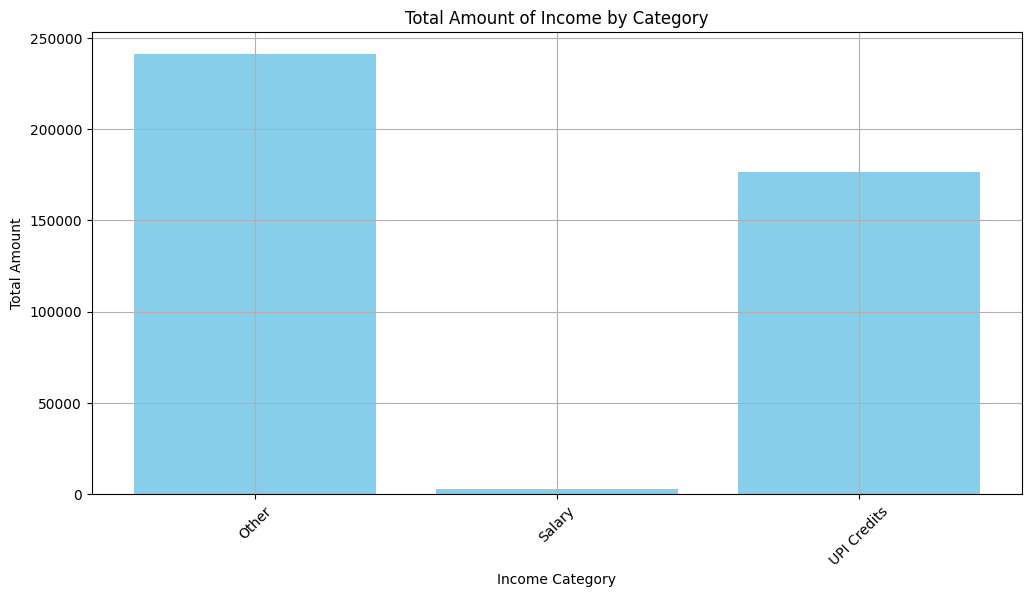

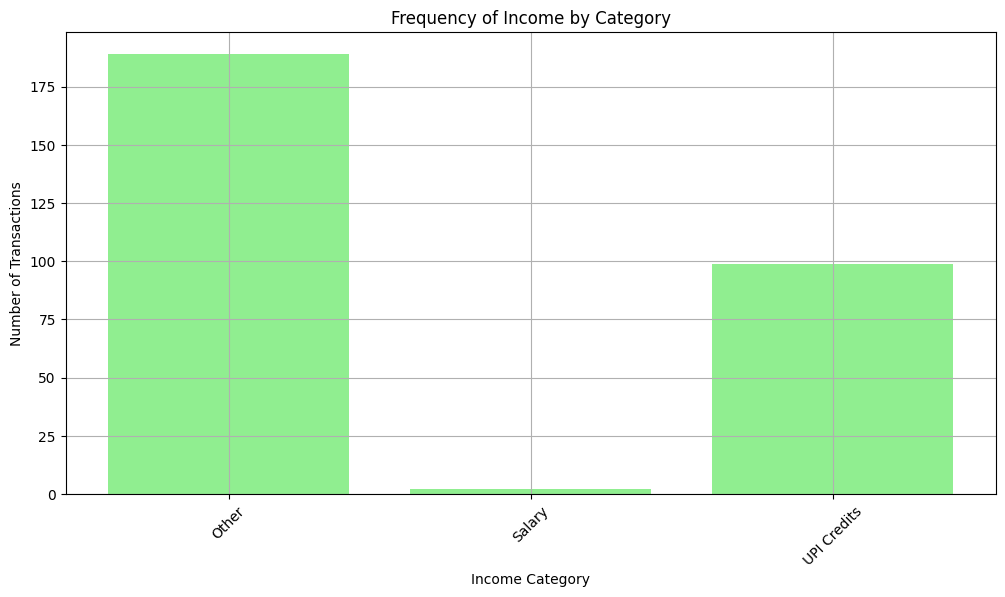

<ipython-input-4-53ae5b8c9e23>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df['transactionTimestamp'] = pd.to_datetime(credit_df['transactionTimestamp'])
<ipython-input-4-53ae5b8c9e23>:78: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  credit_df['month'] = credit_df['transactionTimestamp'].dt.to_period('M')
<ipython-input-4-53ae5b8c9e23>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df['month'] = credit_df['transactionTimestamp'].dt.to_p


Timing patterns of income received:
IncomeCategory     Other  Salary  UPI Credits
month                                        
2023-08          3388.00     0.0       9291.0
2023-09         18740.00     0.0       3865.0
2023-10         17352.00     0.0       4120.0
2023-11         72286.00  2000.0      41451.0
2023-12         35602.51     0.0       2351.0
2024-01         14657.00     0.0       7470.0
2024-02          9788.00     0.0      53994.0
2024-03         14400.00     0.0      11020.0
2024-04         25159.00     0.0      33501.0
2024-05         29865.00   600.0       9670.0


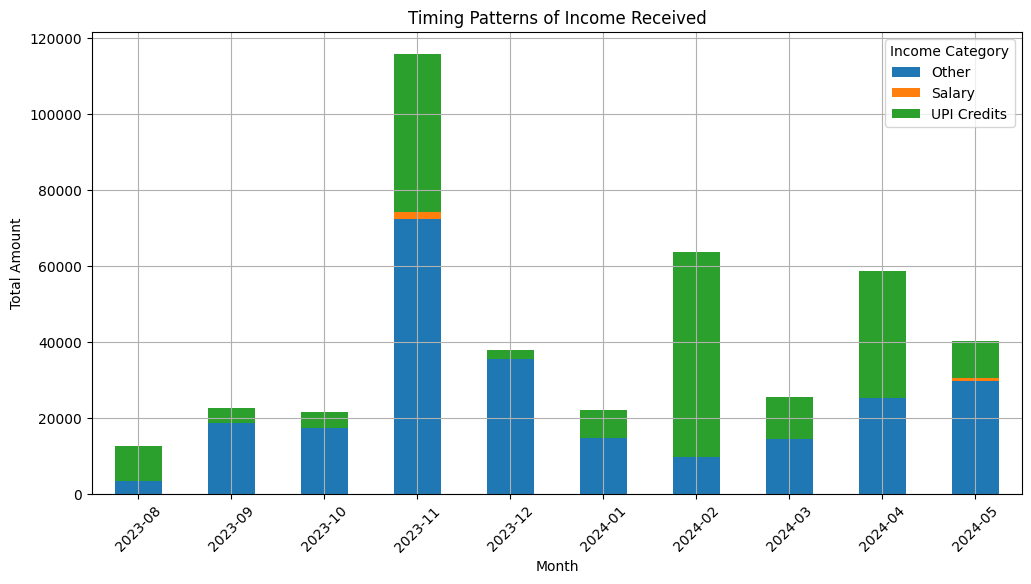

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import json
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = next(iter(uploaded))

# Step 3: Read and parse the JSON file
with open(file_name, 'r') as f:
    data = json.load(f)

# Extract transactions data
transactions = data['Account']['Transactions']['Transaction']

# Convert JSON data to a DataFrame
df = pd.DataFrame(transactions)

# Convert amount to numeric type
df['amount'] = pd.to_numeric(df['amount'])

# Define a function to categorize income based on narration or mode
def categorize_income(narration, mode):
    narration = narration.lower()
    mode = mode.lower()

    if 'salary' in narration or 'sal' in narration:
        return 'Salary'
    elif 'upi' in mode:
        return 'UPI Credits'
    elif 'refund' in narration:
        return 'Refund'
    elif 'interest' in narration:
        return 'Interest'
    else:
        return 'Other'

# Filter only credit transactions
credit_df = df[df['type'] == 'CREDIT']

# Apply categorization function
credit_df['IncomeCategory'] = credit_df.apply(lambda row: categorize_income(row['narration'], row['mode']), axis=1)

# Analyze frequency and amount of income in each category
income_analysis = credit_df.groupby('IncomeCategory').agg(
    Frequency=('amount', 'count'),
    TotalAmount=('amount', 'sum')
).reset_index()

print("\nIncome patterns by category:")
print(income_analysis)

# Plot the income patterns
plt.figure(figsize=(12, 6))
plt.bar(income_analysis['IncomeCategory'], income_analysis['TotalAmount'], color='skyblue')
plt.title('Total Amount of Income by Category')
plt.xlabel('Income Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the frequency of income
plt.figure(figsize=(12, 6))
plt.bar(income_analysis['IncomeCategory'], income_analysis['Frequency'], color='lightgreen')
plt.title('Frequency of Income by Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze timing patterns in income received
credit_df['transactionTimestamp'] = pd.to_datetime(credit_df['transactionTimestamp'])
credit_df['month'] = credit_df['transactionTimestamp'].dt.to_period('M')

# Group by month and category to see patterns
timing_analysis = credit_df.groupby(['month', 'IncomeCategory']).agg(
    TotalAmount=('amount', 'sum')
).reset_index()

# Pivot the timing analysis for better visualization
timing_pivot = timing_analysis.pivot(index='month', columns='IncomeCategory', values='TotalAmount').fillna(0)

print("\nTiming patterns of income received:")
print(timing_pivot)

# Plot the timing patterns
timing_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Timing Patterns of Income Received')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Income Category')
plt.show()

# Optional: Save the analysis results to a CSV file
income_analysis.to_csv('income_analysis.csv', index=False)
files.download('income_analysis.csv')

timing_pivot.to_csv('income_timing_analysis.csv')
files.download('income_timing_analysis.csv')


Saving P1- BankStatements.json to P1- BankStatements (4).json

Unusual or suspicious transactions:
Empty DataFrame
Columns: [transactionTimestamp, type, amount, narration]
Index: []

Low balance alerts:
         transactionTimestamp  currentBalance
4   2023-08-07 17:13:13+05:30          525.80
5   2023-08-22 08:05:06+05:30          524.80
18  2023-08-25 10:39:35+05:30          794.80
19  2023-08-25 12:03:11+05:30          674.80
26  2023-08-25 16:56:59+05:30          175.80
..                        ...             ...
980 2024-05-29 17:57:40+05:30           23.41
981 2024-05-30 05:07:05+05:30          961.41
982 2024-05-30 09:58:24+05:30          901.41
983 2024-05-30 13:30:30+05:30          771.41
984 2024-05-30 13:38:20+05:30          761.41

[209 rows x 2 columns]

High expenditure alerts:
month
2023-09     25117.0
2023-10     20965.0
2023-11    111499.0
2023-12     41627.8
2024-01     23855.7
2024-02     41207.9
2024-03     43641.8
2024-04     63154.9
2024-05     39561.8
Freq: M, 

<ipython-input-5-ebbe1161f709>:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['transactionTimestamp'].dt.to_period('M')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

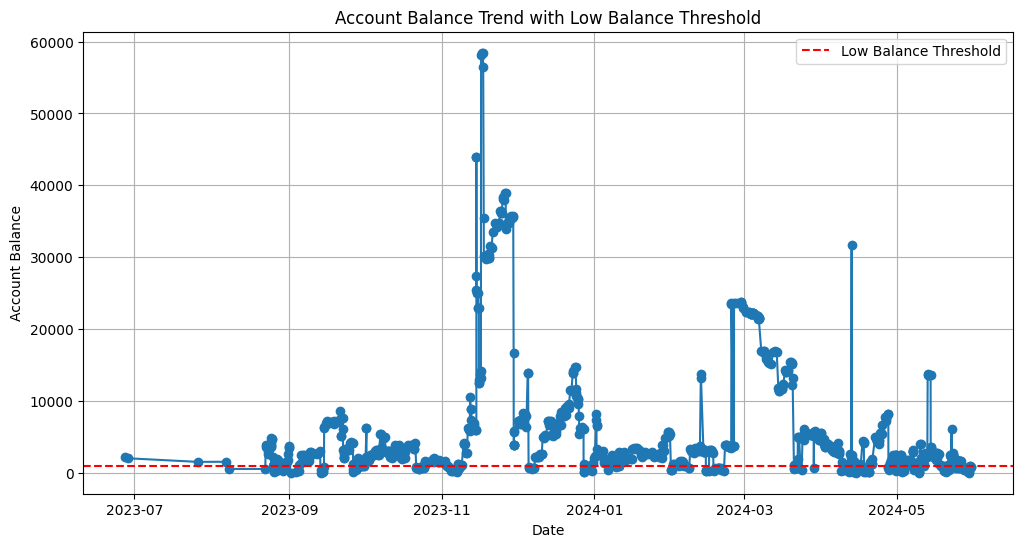

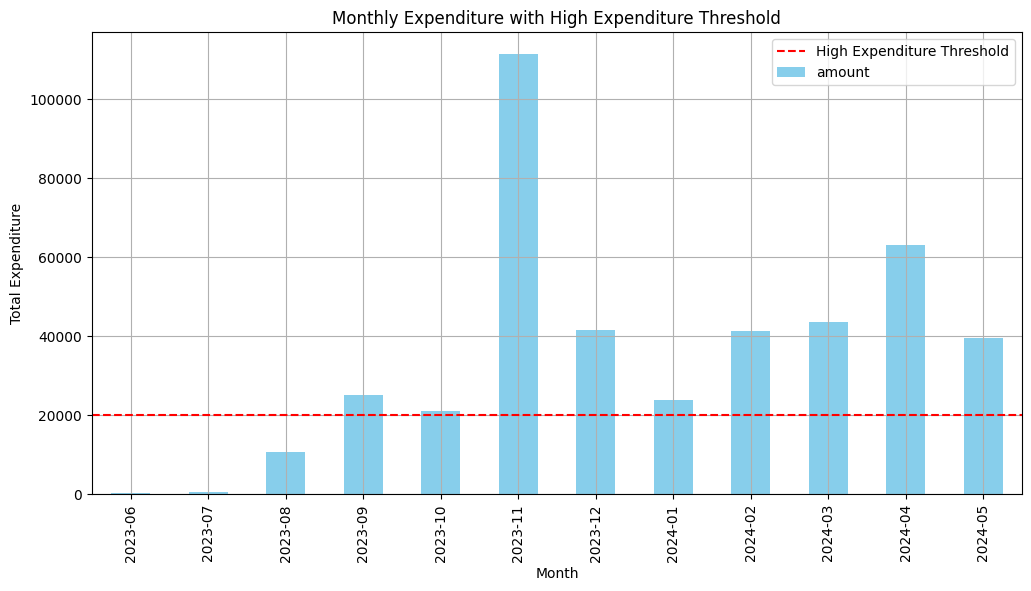

In [ ]:
import pandas as pd
import json
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = next(iter(uploaded))

# Step 3: Read and parse the JSON file
with open(file_name, 'r') as f:
    data = json.load(f)

# Extract transactions data
transactions = data['Account']['Transactions']['Transaction']

# Convert JSON data to a DataFrame
df = pd.DataFrame(transactions)

# Convert amount and current balance to numeric type
df['amount'] = pd.to_numeric(df['amount'])
df['currentBalance'] = pd.to_numeric(df['currentBalance'])

# Convert transaction timestamp to datetime
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])

# Sort DataFrame by transaction timestamp
df.sort_values(by='transactionTimestamp', inplace=True)

# Define criteria for suspicious transactions (e.g., unusually high amount)
suspicious_amount_threshold = 50000  # Example threshold for high amount
suspicious_transactions = df[df['amount'] > suspicious_amount_threshold]

print("\nUnusual or suspicious transactions:")
print(suspicious_transactions[['transactionTimestamp', 'type', 'amount', 'narration']])

# Set a threshold for low balance alerts
low_balance_threshold = 1000  # Example threshold for low balance
low_balance_alerts = df[df['currentBalance'] < low_balance_threshold]

print("\nLow balance alerts:")
print(low_balance_alerts[['transactionTimestamp', 'currentBalance']])

# Set a threshold for high expenditure within a defined period (e.g., monthly)
high_expenditure_threshold = 20000  # Example threshold for high expenditure

# Calculate monthly expenditure
df['month'] = df['transactionTimestamp'].dt.to_period('M')
monthly_expenditure = df[df['type'] == 'DEBIT'].groupby('month')['amount'].sum()

# Generate high expenditure alerts
high_expenditure_alerts = monthly_expenditure[monthly_expenditure > high_expenditure_threshold]

print("\nHigh expenditure alerts:")
print(high_expenditure_alerts)

# Optional: Save the alerts to a CSV file
alerts = {
    "suspicious_transactions": suspicious_transactions[['transactionTimestamp', 'type', 'amount', 'narration']],
    "low_balance_alerts": low_balance_alerts[['transactionTimestamp', 'currentBalance']],
    "high_expenditure_alerts": high_expenditure_alerts.reset_index()
}

alerts_df = pd.concat(alerts, axis=1)
alerts_df.to_csv('alerts.csv', index=False)
files.download('alerts.csv')

# Plot the balance trend to visualize low balance periods
plt.figure(figsize=(12, 6))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-')
plt.axhline(low_balance_threshold, color='r', linestyle='--', label='Low Balance Threshold')
plt.title('Account Balance Trend with Low Balance Threshold')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.legend()
plt.grid(True)
plt.show()

# Plot the monthly expenditure to visualize high expenditure periods
plt.figure(figsize=(12, 6))
monthly_expenditure.plot(kind='bar', color='skyblue')
plt.axhline(high_expenditure_threshold, color='r', linestyle='--', label='High Expenditure Threshold')
plt.title('Monthly Expenditure with High Expenditure Threshold')
plt.xlabel('Month')
plt.ylabel('Total Expenditure')
plt.legend()
plt.grid(True)
plt.show()
